# Fake Movie Ratings

##  A Simple Question
If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

## A Solution
Here I have tried to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

---

## Table of Contents

---

## Background and Data

### Background
The analysis is based on an article [**Be Suspicious Of Online Movie Ratings, Especially Fandango’s**](http://fivethirtyeight.com/features/fandango-movies-ratings/) by [**FiveThirtyEight**](https://fivethirtyeight.com/).

There was an 'bug' in the rounding-up algorithm the popular ticket-selling company [**Fandango**](https://www.fandango.com/) which led to exaggerated movie ratings. Out of 209 films that had 30 or more user reviews on Fandango.com, the average movie gained 0.25 stars from this rounding. Using a normal system, that average should be close to 0.

### Data

The data is taken from **FiveThirtyEight**'s [GitHub](https://github.com/fivethirtyeight/data). The data consits of two .csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like [**Metacritic**](https://www.metacritic.com/), [**IMDB**](https://www.imbd.com/), and [**Rotten Tomatoes**](https://www.rottentomatoes.com/).

#### Data Description

1. **all_sites_scores.csv**

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----

2. **fandango_scape.csv**

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

In [1]:
# Libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

----

## Analysis of Fandango Display Scores and True User Ratings

Here we will try to check if the article's claim is true or not.

In [41]:
fandango = pd.read_csv("fandango_scrape.csv")

In [42]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [43]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [44]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

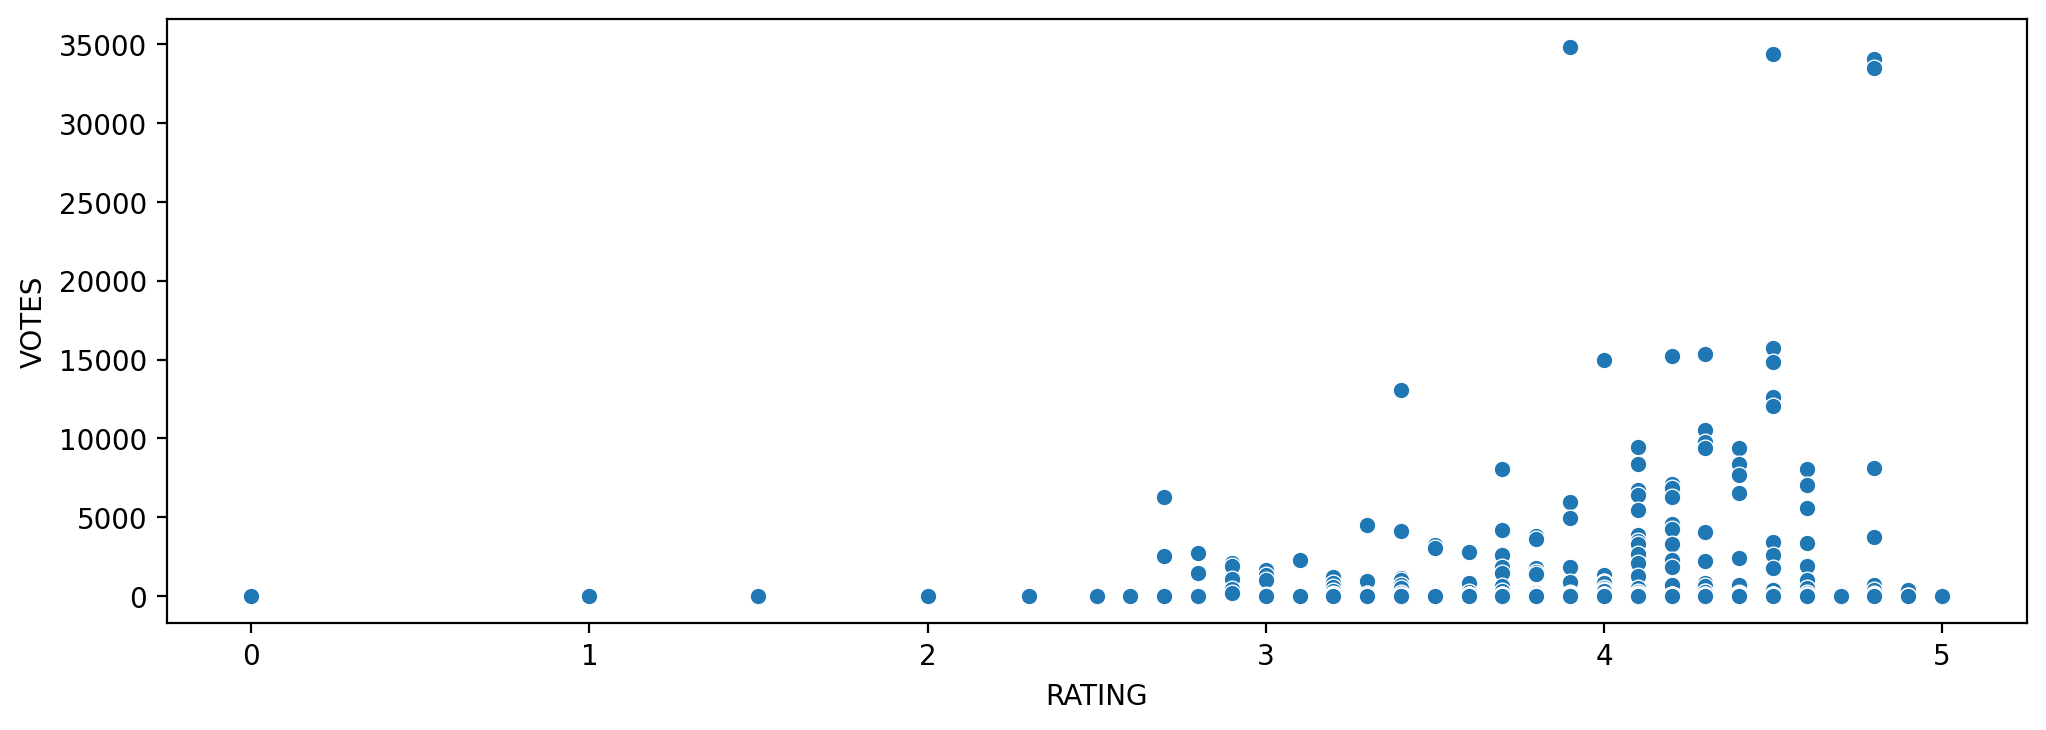

In [8]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [18]:
def film_year(string):
    '''
    Extracts the year from the Film.
    We assume that the format of the film names is uniform
    throughout the data and is of the form 'Film Title Name (Year)'
    '''
    return int(string[-5:-1])

In [19]:
film_year('Fifty Shades of Grey (2015)')

2015

In [21]:
fandango['YEAR'] = fandango['FILM'].apply(film_year)

In [22]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [38]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

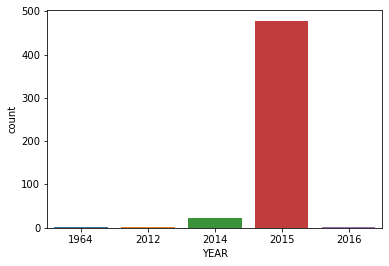

In [42]:
sns.countplot(data=fandango, x='YEAR')

In [44]:
fandango.sort_values(by=['VOTES'],ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [51]:
(fandango['VOTES'] == 0).sum()

69

In [62]:
fan_reviewed = fandango[fandango['VOTES'] !=0]

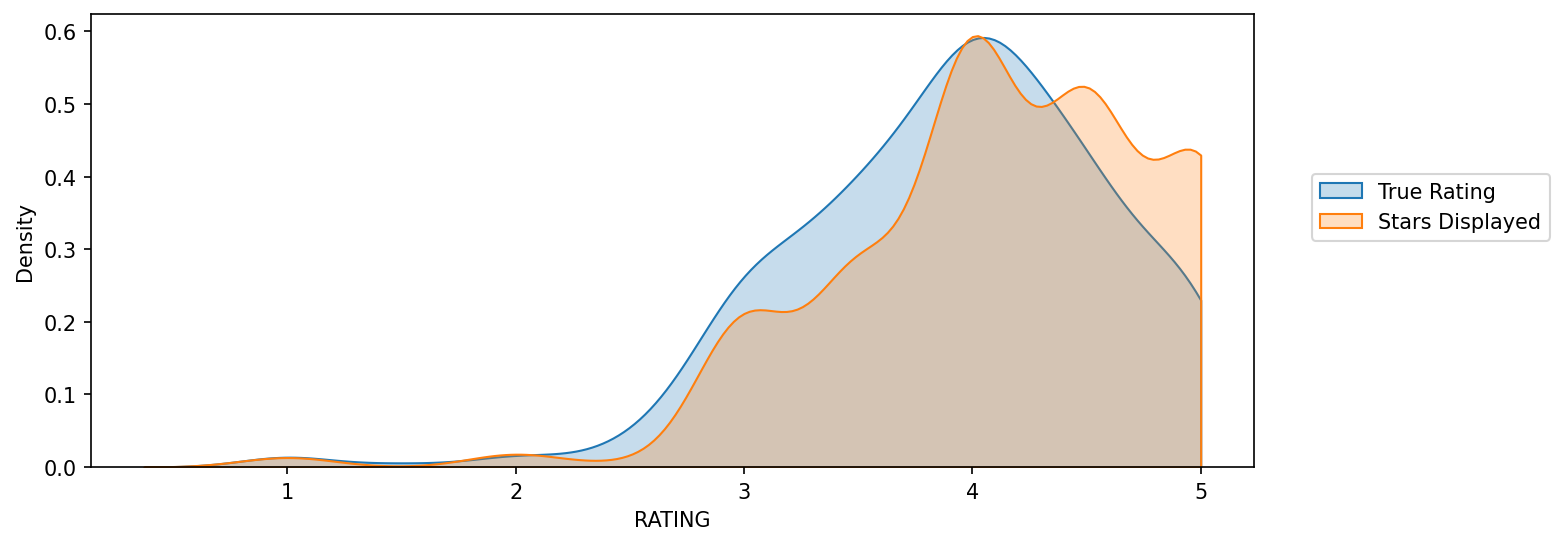

In [63]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [71]:
fan_reviewed['STARS_DIFF'] = round(fan_reviewed['STARS'] - fan_reviewed['RATING'],1)

<ipython-input-71-e1f83a3b1093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = round(fan_reviewed['STARS'] - fan_reviewed['RATING'],1)


In [72]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

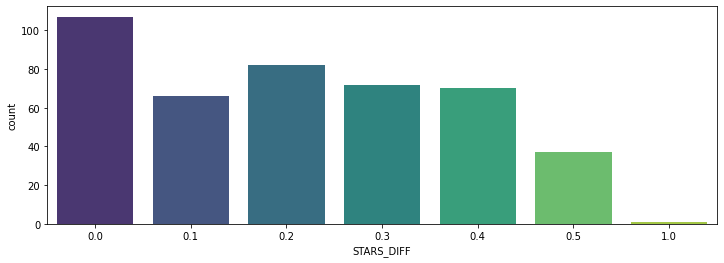

In [75]:
plt.figure(figsize=(12,4))
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='viridis')

In [78]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [3]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [4]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [5]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [6]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

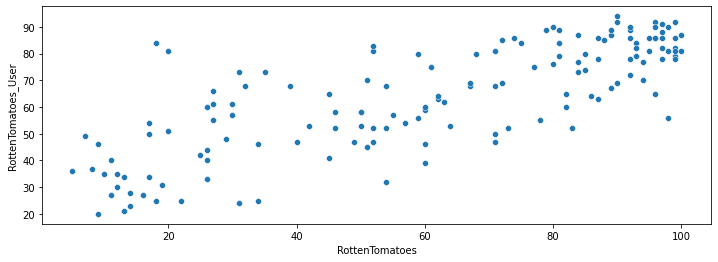

In [7]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=all_sites,x='RottenTomatoes', y='RottenTomatoes_User')

In [8]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [9]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [21]:
all_sites['Abs_Rotten_Diff'] = abs(all_sites['Rotten_Diff'])

In [23]:
all_sites.drop('Abs_Rotten_Diff', axis=1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [12]:
np.mean(abs(all_sites['Rotten_Diff']))

15.095890410958905

<AxesSubplot:title={'center':'RT Critics Score - RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

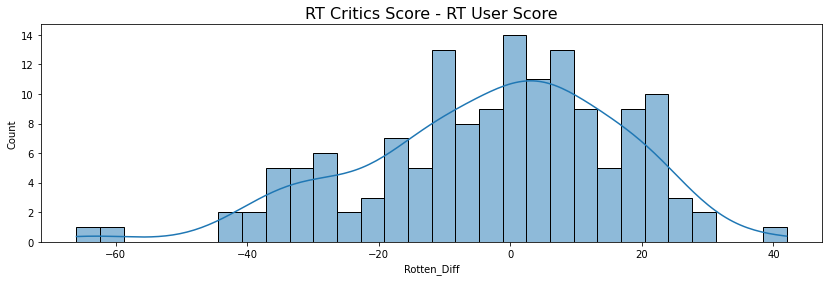

In [19]:
plt.figure(figsize=(14,4))
plt.title('RT Critics Score - RT User Score',fontsize=16)
sns.histplot(data=all_sites,x='Rotten_Diff',bins=30,kde=True)

<AxesSubplot:title={'center':'Absolute Difference between RT Critics Score and RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

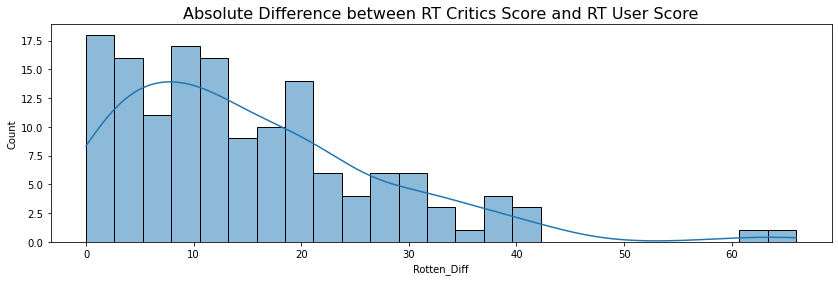

In [24]:
plt.figure(figsize=(14,4))
plt.title('Absolute Difference between RT Critics Score and RT User Score',fontsize=16)
sns.histplot(abs(all_sites['Rotten_Diff']),bins=25,kde=True)

In [32]:
all_sites.sort_values(by=['Rotten_Diff'],ascending=True)[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [31]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [33]:
all_sites.sort_values(by=['Rotten_Diff'],ascending=False)[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


In [34]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

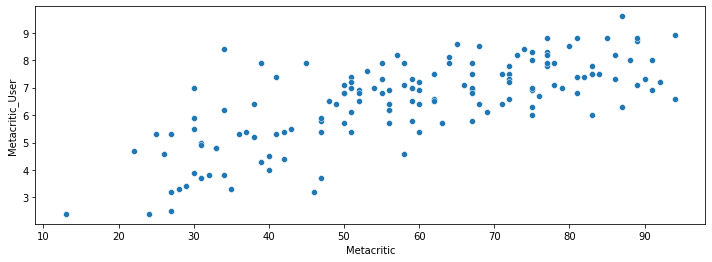

In [35]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=all_sites,x='Metacritic', y='Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

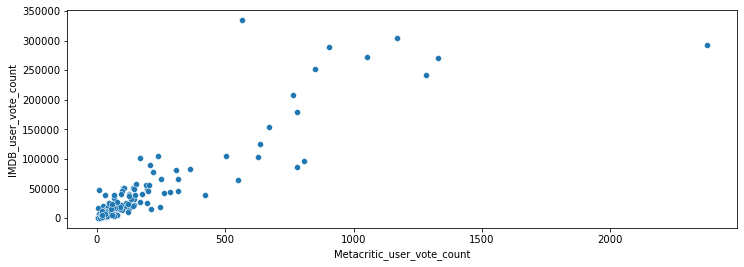

In [38]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [39]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [40]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [45]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [47]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,8


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rotten_Diff                 145 non-null    int64  
 12  Abs_Rotten_Diff             145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


For comparing ratings between sites, we will normalize the ratings by MetaCritic, IMBD and Rotten Tomatoes.

In [54]:
df['RT_Norm'] = df['RottenTomatoes']/20

In [55]:
df['RTU_Norm'] = df['RottenTomatoes_User']/20

In [56]:
df['Meta_Norm'] = df['Metacritic']/20

In [57]:
df['Meta_U_Norm'] = df['Metacritic_User']/2

In [58]:
df['IMDB_Norm'] = df['IMDB']/2

In [59]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,8,4.90,4.50,4.70,4.45,4.30


In [61]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [62]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

In [73]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

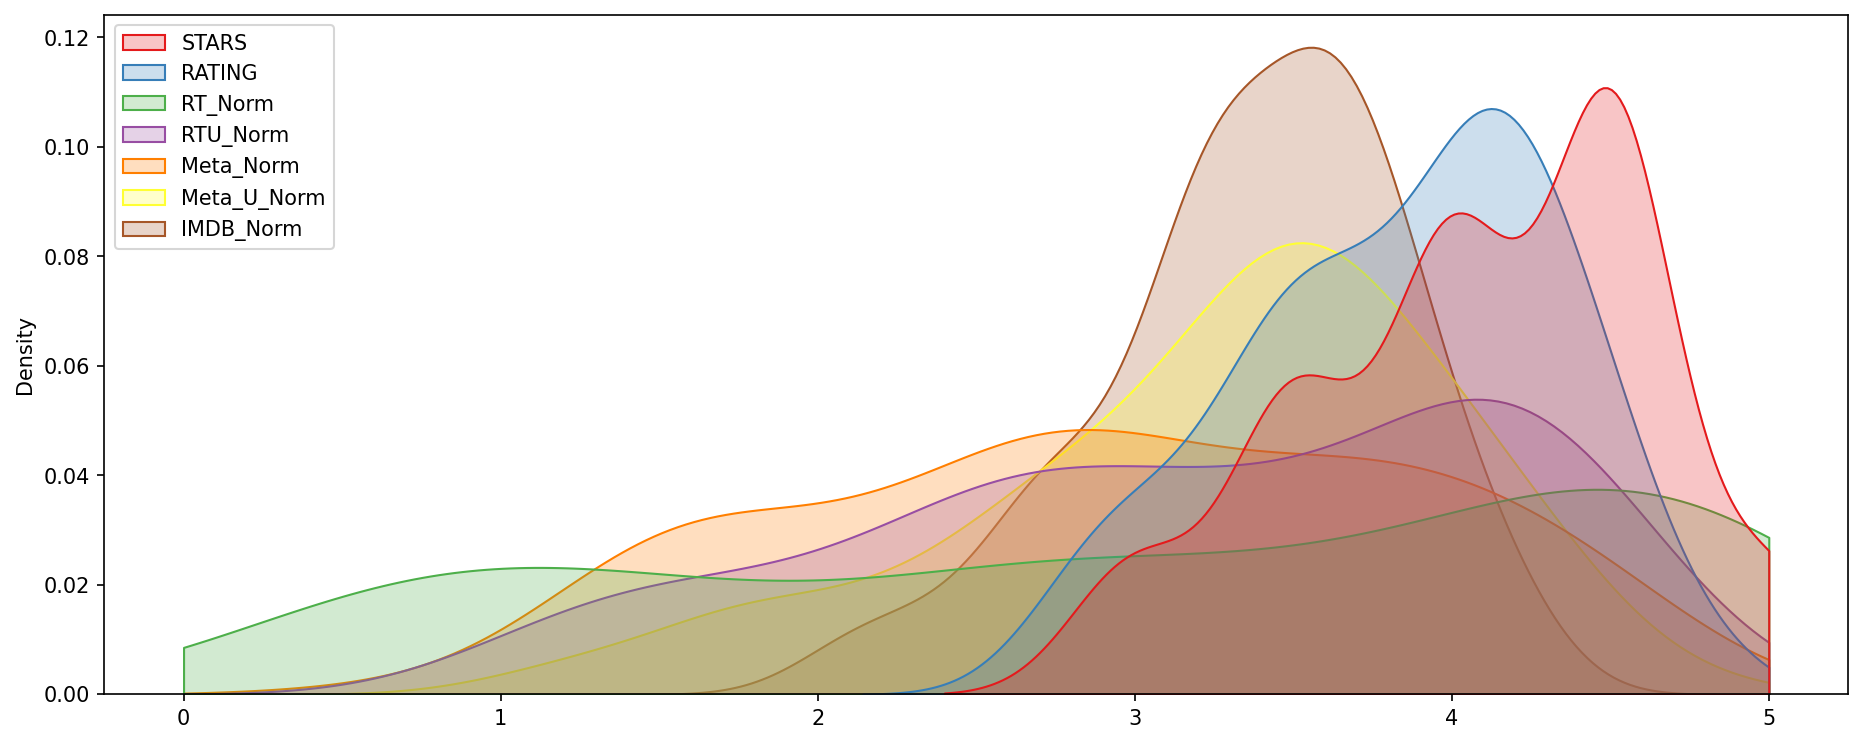

In [74]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

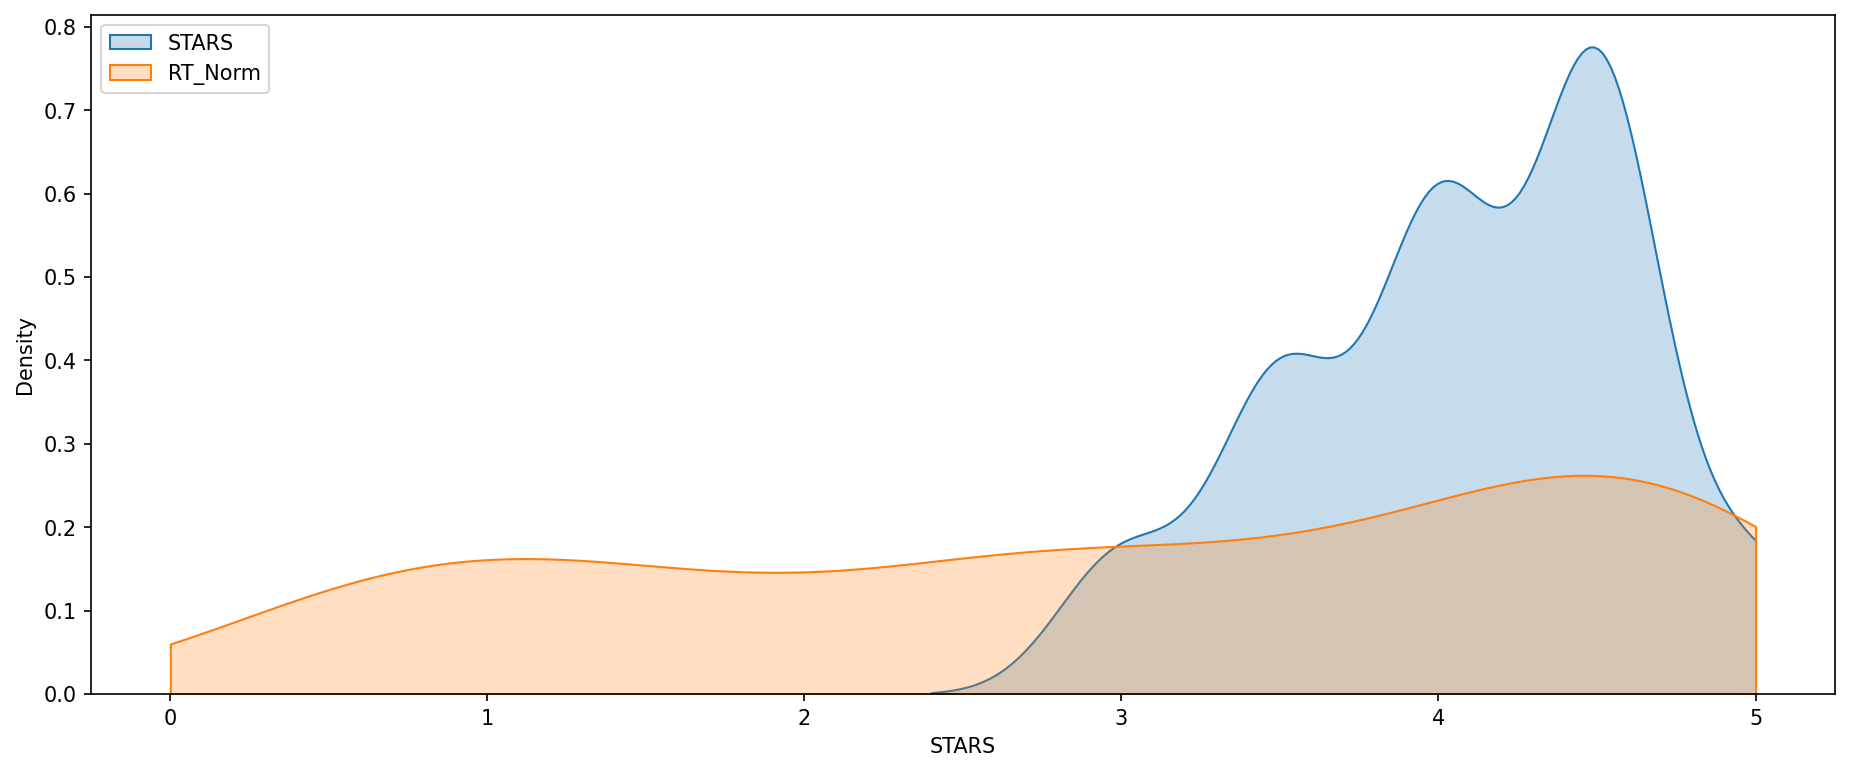

In [78]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,x = 'STARS',clip=[0,5],shade=True,ax=ax,label='STARS')
sns.kdeplot(data=norm_scores,x = 'RT_Norm',clip=[0,5],shade=True,ax=ax,label='RT_Norm')
plt.legend(loc='upper left')

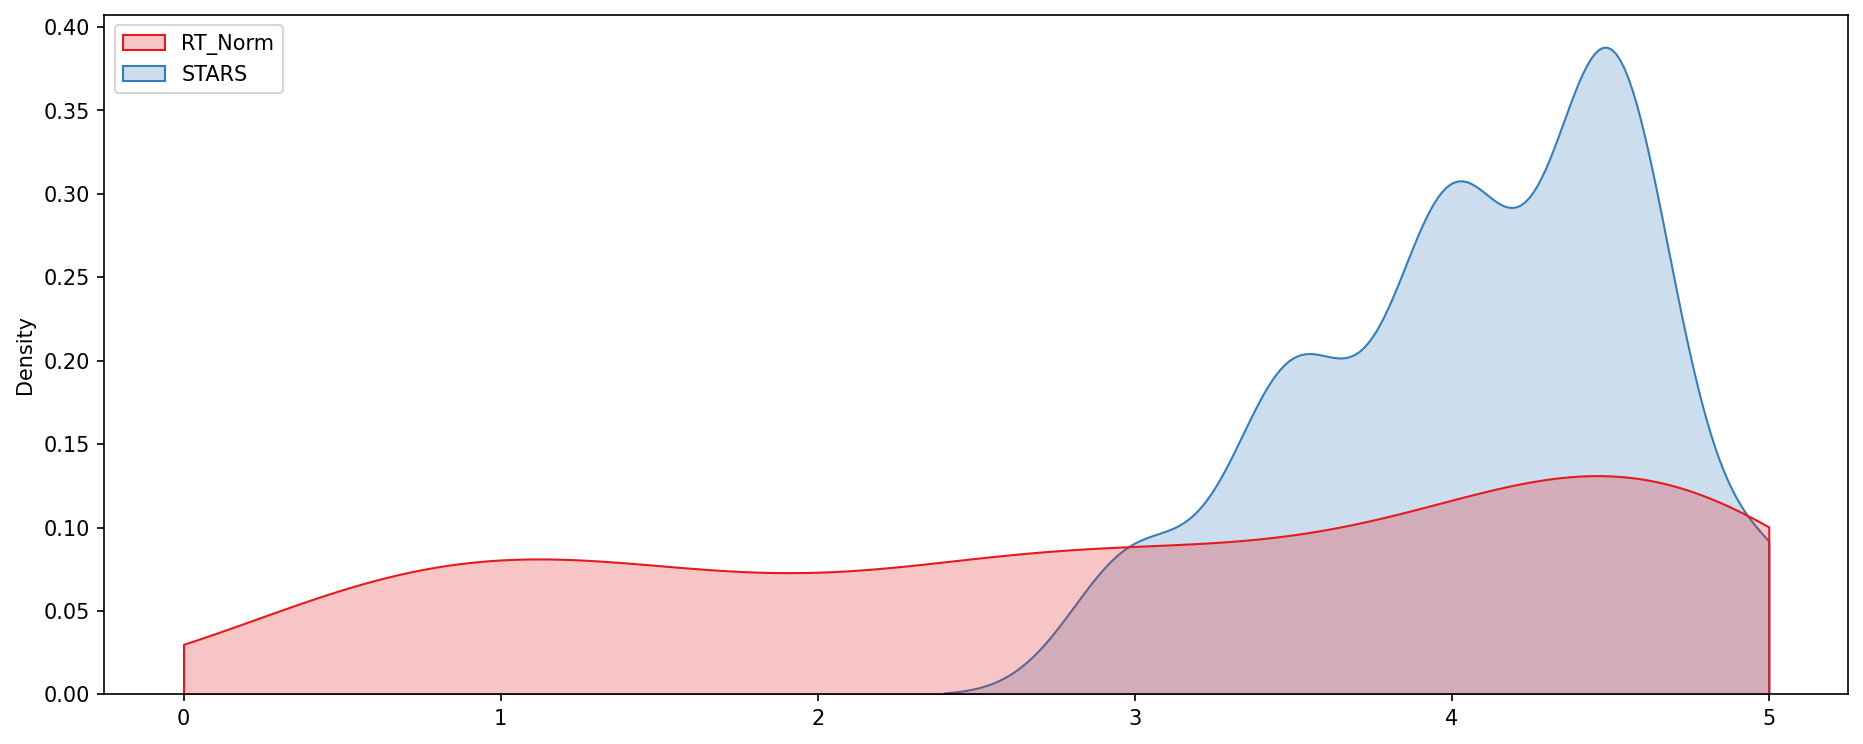

In [79]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

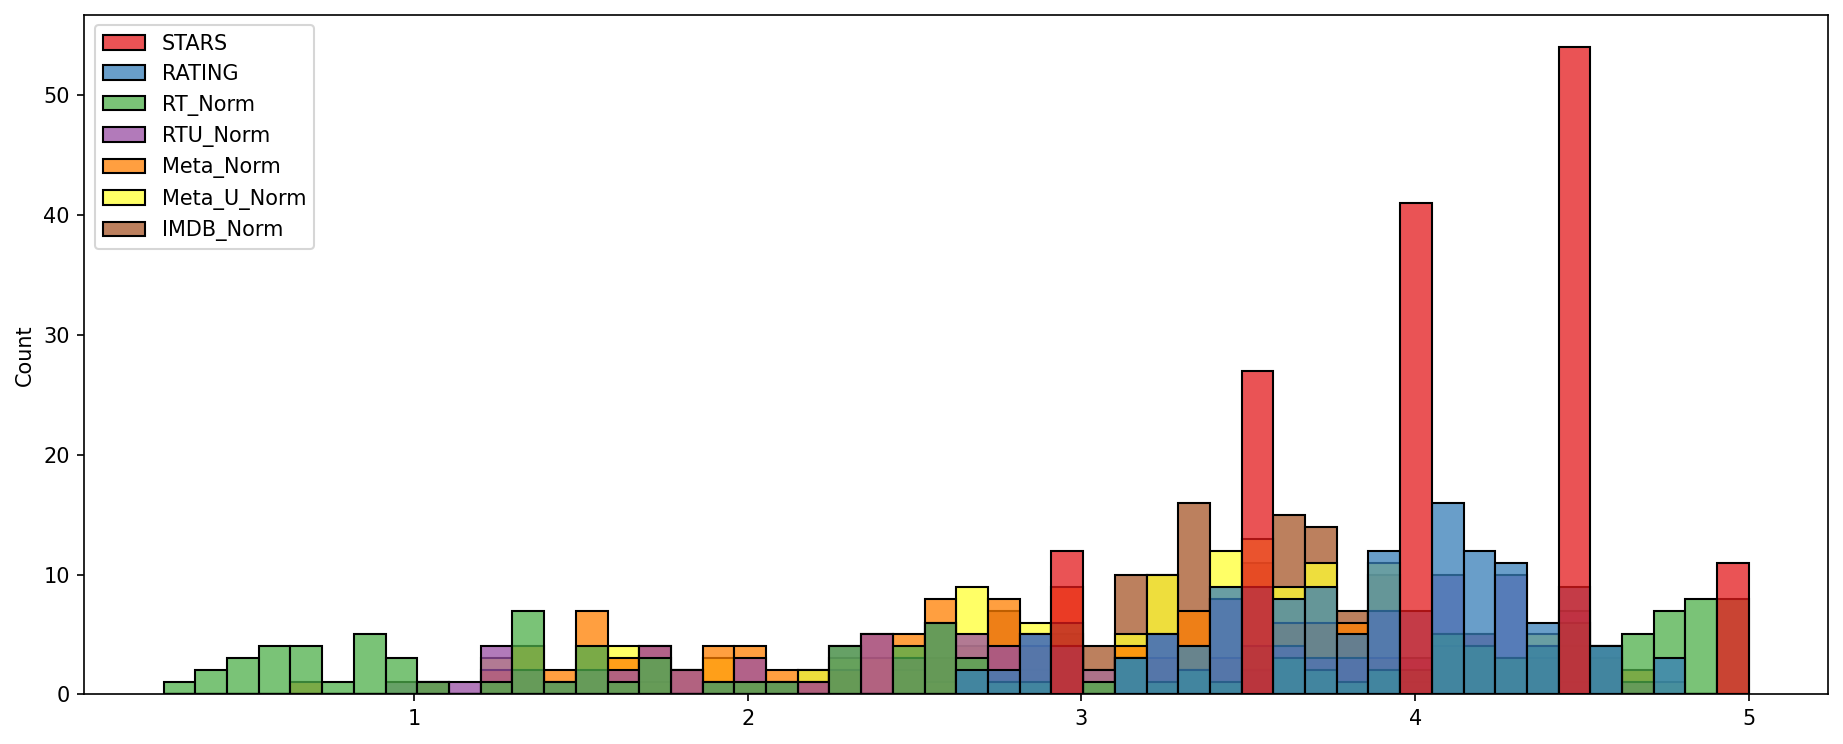

In [90]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(data=norm_scores,palette='Set1',ax=ax,bins=50)
move_legend(ax, "upper left")


### How are the worst movies rated across all platforms?

<Figure size 1200x800 with 0 Axes>

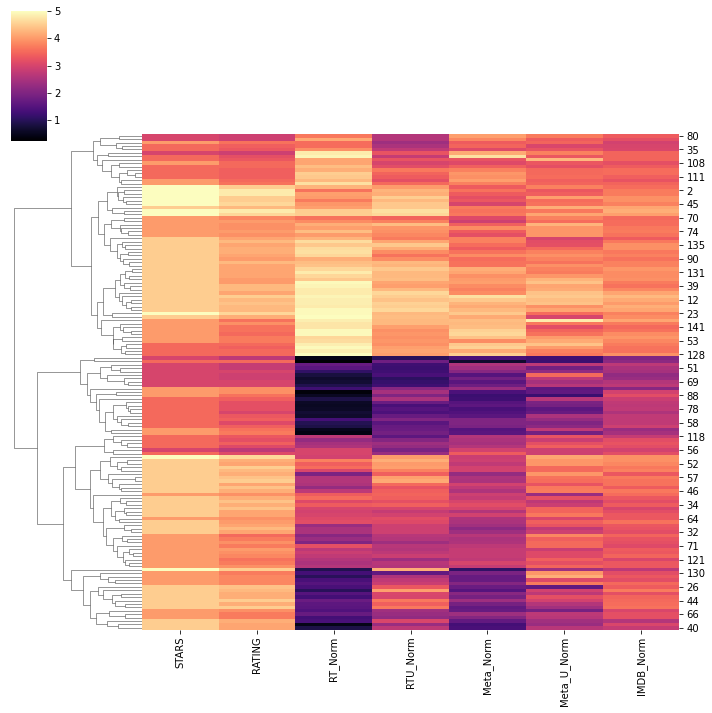

In [95]:
plt.figure(dpi=200)
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [96]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [97]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.25,1.80,0.65,1.20,2.15,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.35,2.45,1.40,1.65,2.95,Hitman: Agent 47 (2015)
54,4.0,3.7,0.40,1.85,1.55,1.85,2.45,Hot Pursuit (2015)
25,4.5,4.1,0.45,2.30,1.30,2.30,3.05,Taken 3 (2015)
28,3.0,2.7,0.45,1.00,1.35,1.25,2.00,Fantastic Four (2015)
50,4.0,3.6,0.50,1.75,1.50,2.75,2.30,The Boy Next Door (2015)
87,3.5,3.2,0.55,1.35,1.60,1.90,2.70,Unfinished Business (2015)
88,4.0,3.6,0.55,2.00,1.20,1.20,3.15,The Loft (2015)
77,3.5,3.2,0.60,1.75,1.50,1.95,2.75,Seventh Son (2015)
78,3.5,3.2,0.60,1.50,1.35,1.60,2.75,Mortdecai (2015)


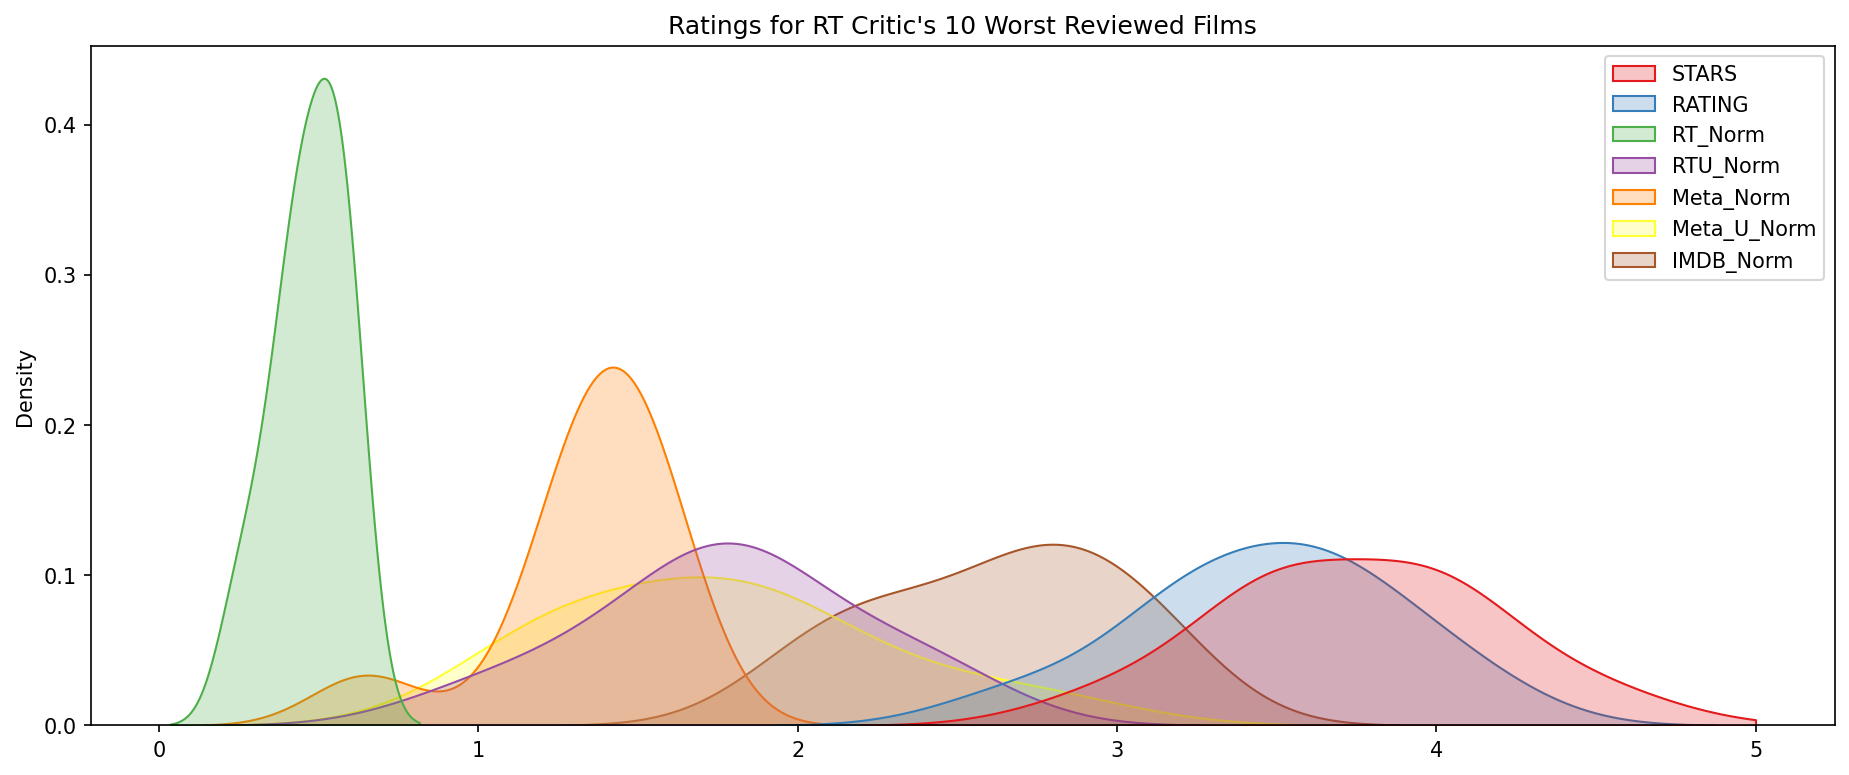

In [98]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [99]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                  0.45
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                3.05
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [100]:
0.4+2.3+1.3+2.3+3

9.3

In [101]:
9.3/5

1.86